<h1 style="color:#361485"><strong>For better visualizations experience check this notebook at: </strong>
<a href='https://www.kaggle.com/code/mahmoudelhusseni/hepatitis-c-prediction'>
<img src='https://img.shields.io/static/v1?style=for-the-badge&message=Kaggle&color=222222&logo=Kaggle&logoColor=20BEFF&label=' alt='Kaggle'></img></a></h1>

<h1 style="color:#361485">Contents</h1>

* [1. Notebook Description](#NB_desc)<br>
* [2. Setting up our Enviroment & Explore dataset](#setting_env)<br>
* [3. Data Preprocessing](#preprocessing)<br>
    * 1. [Handling Nulls.](#nulls)
    * 2. Duplicates.
    * 3. [Outliers.](#outliers)
* [4. Exploratory Data Analysis](#EDA)<br>
    * 1. [Show counts of Categorical Features](#1)
    * 2. [Visulaize correlation between features](#2)
    * 3. [Show relations between different laboratory data.](#3)
    * 4. [Does people from different categories have different laboratory measures?(visualize with respect to Gender)](#4)
    * 5. [Does people with ages have different laboratory measures?(visualize with respect to Gender)](#5)
    
* [5. Feature Engineering](#FE)<br>
* [6. Model Training](#modeling)<br>

<a id='NB_desc'></a>
<h2 style="text-align: center;background-color: #661878; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">
    1 <font color='#EB79BA'><strong>|</strong></font> Notebook Description</h2>

<h2 style="color:#361485"> In This Notebook </h2>

> <font size=3>We have a Hepatitis C Prediction Dataset, that contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data</font>

#### Content
All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:
1. X (Patient ID/No.)<br>
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')<br>
3. Age (in years)<br>
4. Sex (f,m)<br>
#### Attributes 5 to 14 refer to laboratory data:
5. ALB<br>
6. ALP<br>
7. ALT<br>
8. AST<br>
9. BIL<br>
10. CHE<br>
11. CHOL<br>
12. CREA<br>
13. GGT<br>
14. PROT<br>

<font size=3>The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).</font>

<font size=3>For more information check: [Kaggle Hepatitis C Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset)<font>

<a id='setting_env'></a>
<h1 style="text-align:center; background-color:#661878; color:white; padding:14px; border-radius:10px">
    2 <font color='#EB79BA'><strong>|</strong> </font>Setting up our Enviroment & Explore dataset</h1>

In [1]:
import os
import gc
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
from termcolor import colored
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from plotly.subplots import  make_subplots
import warnings; warnings.simplefilter('ignore')



from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Constants
MAIN_DIRECTORY_PATH = '../input/hepatitis-c-dataset/'
ABSOLUTE_PATH = os.path.abspath(MAIN_DIRECTORY_PATH)


# Configurations
os.chdir(ABSOLUTE_PATH)
SEPARATOR = '\n' + colored(90*'=', 'red') + '\n'

# # extract .csv file in case of downlowding data
# DIRECTORY = 'archive.zip'
# ZIP_FILE = os.path.join(ABSOLUTE_PATH, DIRECTORY)
# with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
#     zip_ref.extractall()


# Read & Explore data 
df = pd.read_csv('HepatitisCdata.csv', index_col='Unnamed: 0')
display(df.head(5))
print(SEPARATOR)
display(df.describe(include='object'))
print(SEPARATOR)
display(df.describe())
print(SEPARATOR)
print(df.info())


gc.collect();

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000




<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB
None


<a id='quick_intuitions'></a>
<h2 style="color:#361485">Quick intuitions from data:</h2>

* 1. We need to take in consideration that `Blood Donors` demonstrates our data, since this may lead to biased results.
* 2. It looks that data are collected from people with normal distributed ages.
* 3. There are some laboratory measure that are not normally ditributed: 
    * AST, BIL, GGT: Right Skewed.
    * CREA: may have outliers (mean isn't so far from between. However, max values are far from our distribution)


<a id='preprocessing'></a>
<h2 style="text-align: center;background-color: #661878; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">
    3 <font color='#EB79BA'><strong>|</strong> </font>Data Preprocessing</h2>

<a id='nulls'></a>
<h2 style="color:#361485">Handle Nulls</h2>

In [2]:
nulls = df.isnull().sum().sort_values(ascending=False)
fig = px.bar(nulls, color=-nulls.values, color_continuous_scale='RdBu', title='Total Number of Nulls in each column')

sum_of_nulls = {'showarrow': False, 'text':f'Total number of nulls : {nulls.sum()}', 'x':8, 'y':10, 'bgcolor':'#661878', 'font':{'size':25., 'color':'white'}, 'borderpad':10}
fig.update_layout(dict(xaxis={'title': {'text':"Columns", 'font':{'size':20, 'color':'#361485'}}}), 
                 annotations=[sum_of_nulls])
fig.show()

<font size=4> <strong><font color='#361485'>Fortunately</font></strong>, We have small number of nulls,So We can just fill them with their column's mean, median or mode (according to their columns).</font>


In [3]:
columns = nulls[nulls.values>0].index
fig = make_subplots(rows=5, cols=1, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Histogram(x=df[col], name=col),\
                  
                  row=i+1, col=1)
    
fig.update_layout(height=1080)
fig.show()

<font size=3> 

- It looks that there are few outliers in <strong>ALP</strong> column starts to appear after <strong>```ALP=150```</strong>.<br>
So we can impute nulls in this column either using median (robust to outliers) or mean of values before 150.<br>
    
- <strong>CHOL & ALB</strong>: are normally distributed, so we can fill null values with mean.<br>

- <strong>ALT</strong> is highly right skewed, it's better to use median imputation.<br>

- <strong>PROT</strong> is slightly left skewed, we can just fill nulls with median.    
</font>

In [4]:
# impute nulls in ALP

mean_before150 = df.loc[df.ALP>=150, 'ALP'].mean()
df['ALP'] = df.ALP.fillna(value=mean_before150)

# impute nulls in CHOL & ALB
df['CHOL'] = df['CHOL'].fillna(value=df.CHOL.mean())
df['ALB'] = df['ALB'].fillna(value=df.ALB.mean())

# impute nulls in ALT & PROT
df['ALT'] = df['ALT'].fillna(value=df.ALT.median())
df['PROT'] = df['PROT'].fillna(value=df.PROT.mean())

# print number of nulls
print(SEPARATOR)
print(f'Number of Nulls in our dataframe = {df.isnull().sum().sum()}')
print(SEPARATOR)

gc.collect()



Number of Nulls in our dataframe = 0




1210

<font size=3>Finally, there are no more nulls 🥳️</font>

<h2 style="color:#361485">Duplicates</font>

In [5]:
print(SEPARATOR)
print(f'Number of Duplicates in our dataframe = {df.duplicated().sum()}')
print(SEPARATOR)



Number of Duplicates in our dataframe = 0




<font size=3>Fortunately, There is no duplicates in our dataset.</font>

<a id='outliers'></a>
<h2 style="color:#361485">Outliers</font>

<font size=3>For Detecting outliers, I am going to use box plot where `whiskers` indicates the allowed region of value (point outside these whiskers are considered outliers)</font>

In [6]:
columns = df.columns.drop(['Category', 'Sex'])
n_cols = 2
n_rows = len(columns) // n_cols + 1

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(x=df[col], name=col),
                  row=i//n_cols+1, col=int(i%n_cols)+1)

fig.update_layout(height=1080)
fig.show()

<font size=3>
It seems that our data suffers from a sensible amount of outliers,<br>
    

Columns that has much outliers (sorted by number of outliers descinding):<br>
1. CREA (as expected in [Quick intuitions from data section](#quick_intuitions))
2. GGT & BIL.
3. AST & ALT.
4. ALP.

So We need a function that detect outlier points in each column and remove them, <br>

I am going to use $1.5 \times IQR$ method to detect and remove outliers, but instead I will change the `1.5` ratio to prevent losing much data as our data isn't large.
</font>
![img](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)

In [7]:
IQR = lambda col : np.percentile(col, 75) - np.percentile(col, 25)

def drop_outliers(dfcopy:pd.DataFrame, cols:list, ratio:float=1.5, inplace=False) -> pd.DataFrame: 
    '''
    Args: 
        dfcopy:  the dataframe that contains our set of columns.
        cols: Names of columns that need to be cleaned from outliers.
        ratio: ratio of allowed range of data (default all data should be between -1.5*IQR : 1.5*IQR)
        inplace: if True outliers of df will be deleted, else it will return a new df.
        
    Raises:
        KeyError: if cols[i] isn't in provided df.
        ValueError: if cols isn't list.
        
    Return: 
        df: a new dataframe without outliers
    '''
    if type(cols) != type([]):
        raise TypeError('Invalid type for cols: should be list')
        
    if inplace:
        _df = dfcopy
    else:
        _df = dfcopy.copy()
        
    
    for col in tqdm(cols):
        # check column exsisted
        if col not in df.columns:
            raise KeyError(f'Column {col} can\'t be found in this df')
        print(f'[INFO...] Removing outliers from column: {col}')
        
        # tarsfrom columns to be normally ditributed
        mean, std = _df[col].mean(), _df[col].std()
        col = _df[col].apply(lambda x : (x - mean) / std)
        
        # calculate iqr and catch outliers
        iqr = ratio * IQR(col)
        outliers_idx = _df[np.abs(col) > iqr].index
        
        # remove outliers 
        _df.drop(outliers_idx, axis=0, inplace=True)
        
    return _df

df_withoutliers = df.copy()
df = drop_outliers(df, ['CREA', 'GGT', 'BIL', 'AST', 'ALT', 'ALP'], 3, inplace=False)

print(SEPARATOR)
print(f'This method have droped {round(len(df) / len(df_withoutliers) * 100, 5)} % of our dataset')
print(SEPARATOR)

gc.collect()

100%|██████████| 6/6 [00:00<00:00, 325.19it/s]


[INFO...] Removing outliers from column: CREA
[INFO...] Removing outliers from column: GGT
[INFO...] Removing outliers from column: BIL
[INFO...] Removing outliers from column: AST
[INFO...] Removing outliers from column: ALT
[INFO...] Removing outliers from column: ALP


This method have droped 85.36585 % of our dataset




624

<a id='EDA'></a>
<h2 style="text-align: center;background-color: #661878; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">
    4 <font color='#EB79BA'><strong>|</strong> </font>Exploratory Data Analysis</h2>

<a id=1></a>
<h2 style="color:#361485">Show counts of Categorical Features</h2>

In [8]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Category', 'Sex'], specs=[[{'type': 'xy'}, {'type': 'domain'}]])

# Category: 
category_counts = df.groupby('Category')['Category'].count().sort_values(ascending=False)
text  = np.round(category_counts.values / category_counts.values.sum()*100, 2)
fig.add_trace(go.Bar(x=category_counts.index, y=category_counts.values, name='Category',
                     opacity=0.6, marker_line_width=2, marker_line_color='#1F610C', marker_color='#1FC60C',
                     text=text, texttemplate='%{text:.2f} %', textfont={'color':'black', 'size':15})
              , row=1, col=1)

# Sex: 
sex_counts = df.groupby('Sex')['Sex'].count()
sex_counts.index  = ['Female', 'Male']

colors = ['pink', 'darkblue']
fig.add_trace(go.Pie(values=sex_counts.values, labels=sex_counts.index, name='Sex', hole=0.5,
                     textinfo='label', marker_colors=colors, textfont={'size':15}),
              row=1, col=2)
fig.update_layout(title_text='Counts of Category & Sex ')

<h2 style="color:#D1003F">Intuitions: </h2>

> <font size=3>
    1. There are much Blood donors in our dataset. <br> 2. Males are more than Females but not large difference.</font>

<a id=2></a>
<h2 style="color:#361485">Visulaize correlation between features</h2>

In [9]:
laboratory_columns = df.drop(['Category', 'Age', 'Sex'], axis=1).columns
corr = df.loc[:, laboratory_columns].corr()

for i in range(len(laboratory_columns)):
    for j in range(len(laboratory_columns)):
        if (i<j):
            corr.values[i, j:] = 0
            break
            
fig = px.imshow(corr, color_continuous_scale='balance', zmin=-1, zmax=1)
fig.update_traces(texttemplate="%{text}", text=corr.round(2))
fig.update_layout(height=1080)
fig.show()

<h2 style="color:#D1003F">Intuitions: </h2>

> <font size=3>
    1. There are much collinearity in our dataset.<br>
    2.ALP & PROT have the highest correlation.<br>
    3. ALP & CREA and BIL & CHOL both have zero correlation.</font>

<a id=3></a>
<h2 style="color:#361485">Show relations between different laboratory data. (with repect to is Blood Donor or not)</h2>

<Figure size 1440x864 with 0 Axes>

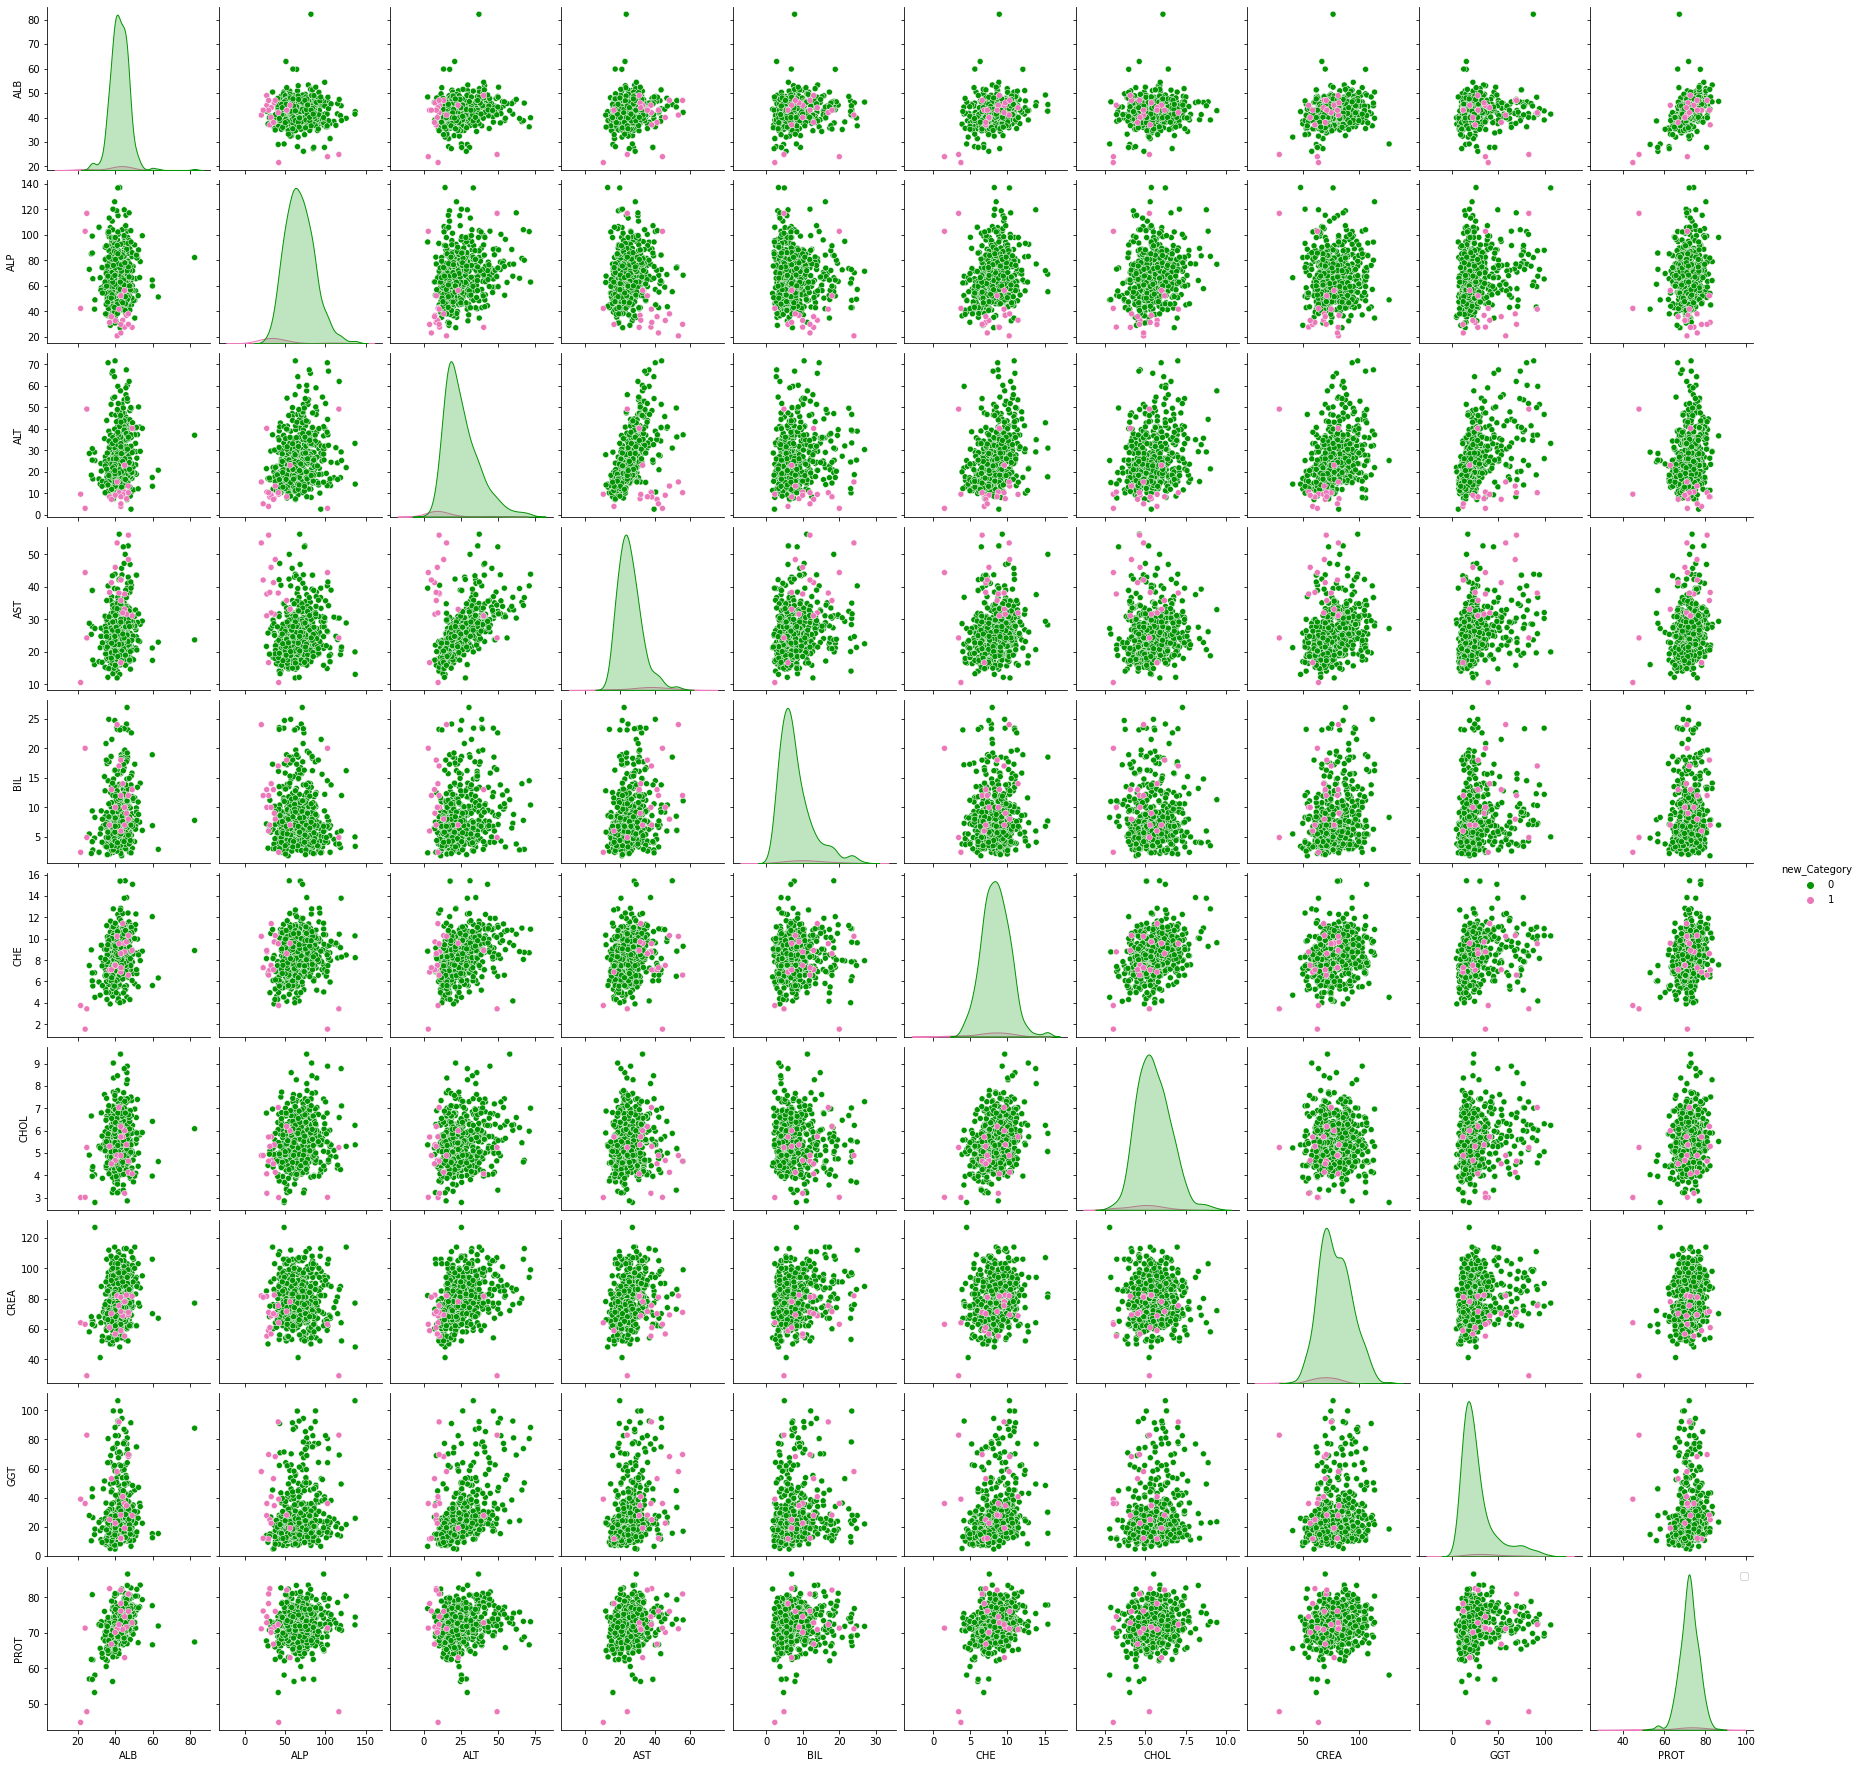

In [10]:
df['new_Category'] = np.where(df['Category']=='0=Blood Donor', 0, 1)

plt.figure(figsize=(20, 12))
sns.pairplot(data=df[[*laboratory_columns]+['new_Category']], hue='new_Category', palette=['#039404', '#EB79BA'])
plt.legend();

In [11]:
fig = make_subplots(rows=2, cols=len(laboratory_columns), subplot_titles=laboratory_columns)
feat = ['ALT', 'ALP']
donors = df.loc[df.new_Category==0]
non_donors = df.loc[df.new_Category==1]

for i in range(2):
    for j in range(len(laboratory_columns)):
        trace1 = go.Scatter(x=donors[feat[i]], y=donors[laboratory_columns[j]], mode='markers')
        trace2 = go.Scatter(x=non_donors[feat[i]], y=non_donors[laboratory_columns[j]], mode='markers')
        fig.add_trace(trace1, row=i+1, col=j+1)
        fig.append_trace(trace2, row=i+1, col=j+1)


        
fig.update_layout(showlegend=False, height=520)
fig.show()
gc.collect()

306663

<h2 style="color:#D1003F">Intuitions: </h2>

> <font size=3>
    1. <strong>ALT, ALP</strong> have not blood donors in a corner can be splitted from blood donors<br>
</font>

<a id=4></a>
<h2 style="color:#361485">Does people from different categories have different laboratory measures?(visualize with respect to Gender)</h2>

In [12]:
labs = pd.DataFrame()
labs = StandardScaler().fit_transform(df[laboratory_columns])
labs = pd.DataFrame(labs, columns=laboratory_columns)
labs['mean'] = labs.mean(axis=1)
labs['Category'] = df['Category'].values
labs = labs.groupby('Category').mean()['mean'].sort_values(ascending=True)

px.bar(labs, labs.index, labs.values, color=labs.values, color_continuous_scale=['darkred', 'lightblue'])

<h2 style="color:#D1003F">Intuitions: </h2>

> <font size=3>
    1. suspect Bloof Donors have least average laboratory measures.<br>
    2. Average of labs measures of Blood donors is almost 0.<br>
</font>

<a id=5></a>
<h2 style="color:#361485">Does people with ages have different laboratory measures?(visualize with respect to Gender)</h2>

In [13]:
labs = pd.DataFrame()
labs = StandardScaler().fit_transform(df[laboratory_columns])
labs = pd.DataFrame(labs, columns=laboratory_columns)
labs['mean'] = labs.mean(axis=1)

labs['Age'] = df['Age'].values

labs = labs.groupby('Age').mean()['mean']
fig = px.bar(labs, labs.index, labs.values, color=labs.values, color_continuous_scale=['darkred', 'lightblue'])
fig.update_layout({'xaxis':{'tick0':25, 'dtick':1}})

<a id='FE'></a>
<h2 style="text-align: center;background-color: #661878; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">
    5 <font color='#EB79BA'><strong>|</strong> </font>Feature Engineering</h2>

In [14]:
# create TP feature derived from two columns
# ALT & ALP -> 17.3, 54

def FeatureEngineering(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Args:
        df: data you want to extract new features from.
        
    Return:
        df: data after adding extracted features.
    '''
    
    # Create binary (0, 1) column if ALT in range(0, 17.3) and ALP in range(0, 54):
    df['TP'] = [*map(int, ((df['ALT']<=17.3).values & (df['ALP']<=54).values))]
    
    # Encode Sex Column
    df['Sex'] = OrdinalEncoder().fit_transform(df['Sex'].values.reshape(-1, 1))
    
    # Normalize data to be in the same range of values
    df = StandardScaler().fit_transform(df)
    
    return df
    
df_without_FE = df.copy()

X = df.drop(['Category', 'new_Category'], axis=1)
y = df['new_Category'].values
X = FeatureEngineering(X)

<a id='modeling'></a>
<h2 style="text-align: center;background-color: #661878; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">
    6 <font color='#EB79BA'><strong>|</strong> </font> Model Training</h2>

In [15]:
class Model:
    
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.params = model.get_params()
        self.threshold = threshold
        
    
    def model_predict(self, X, threshold=None):
        if threshold==None:
            threshold=self.threshold
            
        y_pred_proba = self.model.predict_proba(X)
        y_pred_proba = y_pred_proba[:, 1]
        y_pred = pd.Series(map(int, [*(y_pred_proba>threshold)]))
        
        return y_pred
        
    def K_cv_score(self, X, y, K=5):
        cv_scores = []
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices, :]
        y = y[indices]
        n_train = len(X) // K
        for i in range(K):
            X_val = X[n_train*i : n_train*(i+1)]
            y_val = y[n_train*i : n_train*(i+1)]
            X_train = np.delete(X, np.arange(n_train*i, n_train*(i+1)), axis=0)
            y_train = np.delete(y, np.arange(n_train*i, n_train*(i+1)), axis=0)
            
            self.model.fit(X_train, y_train.reshape(-1, 1))
            y_pred = self.model_predict(X_val)
            score = self.f1_score(y_val, y_pred)
            cv_scores.append(score)
            
        return cv_scores
        
            
    def f1_score(self, y_true, y_pred):
        TP = np.sum((y_pred==1) & (y_true==1))
        FP = np.sum(y_pred > y_true)
        FN = np.sum(y_pred < y_true)
            
        f1 = TP / (TP + 0.5 * (FP + FN))
            
        return f1
        
            
    def tune_thresh(self, X, y, thresholds, plot=False, update=False):
        scores = []
        for threshold in thresholds: 
            y_pred = self.model_predict(X, threshold=threshold)
            threshold_s = self.f1_score(y, y_pred)
            scores.append(threshold_s)
        
        xmax, ymax = thresholds[np.argmax(scores)], np.max(scores)
        if plot:
            max_thresh_score = {'showarrow':True, 'text':f'Maximum score: {ymax} \n at threshold: {xmax:.2f}', 'x':xmax, 'y':ymax, 'bgcolor':'#661878', 'font':{'size':20, 'color':'white'}, 'borderpad':10}
                                
            fig = go.Figure(go.Scatter(x=thresholds, y=scores, mode='lines+markers'))
            fig.update_layout({'annotations':[max_thresh_score]})
            fig.show()

        if update:
            self.threshold = xmax
            
        return xmax

<h2 style="color:#361485">LogisticRegression</h2>

In [16]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=101, shuffle=True)

LRmodel = Model(LogisticRegression())
LRmodel.model.fit(X, y)
threshold = LRmodel.tune_thresh(X, y, np.arange(0.3, 0.8, 0.05), plot=True, update=True)

cv_scores = LRmodel.K_cv_score(X, y, K=4)
print(SEPARATOR)
print(f'Cross Validation scores: {cv_scores}')
print(SEPARATOR)

y_pred = LRmodel.model_predict(X_test)
print(f'Score of test set with Logistic Regression: {LRmodel.f1_score(y_test, y_pred)}')
print(SEPARATOR)



Cross Validation scores: [0.6666666666666666, 0.8, 0.75, 0.3333333333333333]


Score of test set with Logistic Regression: 1.0




<h2 style="color:#361485">DecissionTree</h2>

In [17]:
DTmodel = Model(DecisionTreeClassifier())
DTmodel.model.fit(X, y)
threshold = DTmodel.tune_thresh(X, y, np.arange(0.3, 0.8, 0.05), plot=True, update=True)

cv_scores = DTmodel.K_cv_score(X, y, K=4)
print(SEPARATOR)
print(f'Cross Validation scores: {cv_scores}')
print(SEPARATOR)

y_pred = DTmodel.model_predict(X_test)
print(f'Score of test set with Logistic Regression: {DTmodel.f1_score(y_test, y_pred)}')
print(SEPARATOR)



Cross Validation scores: [0.4, 0.6666666666666666, 0.5454545454545454, 0.0]


Score of test set with Logistic Regression: 0.8




<h2 style="color:#361485">Random Forest</h2>

In [18]:
RFmodel = Model(RandomForestClassifier())
RFmodel.model.fit(X, y)
threshold = RFmodel.tune_thresh(X, y, np.arange(0.3, 0.8, 0.05), plot=True, update=True)

cv_scores = RFmodel.K_cv_score(X, y, K=4)
print(SEPARATOR)
print(f'Cross Validation scores: {cv_scores}')
print(SEPARATOR)

y_pred = RFmodel.model_predict(X_test)
print(f'Score of test set with Logistic Regression: {RFmodel.f1_score(y_test, y_pred)}')
print(SEPARATOR)



Cross Validation scores: [0.6666666666666666, 0.7272727272727273, 0.5, 0.8571428571428571]


Score of test set with Logistic Regression: 1.0




<h2 style="color:#361485">XGboost</h2>

In [19]:
XGBmodel = Model(XGBClassifier())
XGBmodel.model.fit(X, y)
threshold = XGBmodel.tune_thresh(X, y, np.arange(0.3, 0.8, 0.05), plot=True, update=True)

cv_scores = XGBmodel.K_cv_score(X, y, K=4)
print(SEPARATOR)
print(f'Cross Validation scores: {cv_scores}')
print(SEPARATOR)

y_pred = XGBmodel.model_predict(X_test)
print(f'Score of test set with Logistic Regression: {XGBmodel.f1_score(y_test, y_pred)}')
print(SEPARATOR)



Cross Validation scores: [0.8, 0.5714285714285714, 0.6666666666666666, 0.6666666666666666]


Score of test set with Logistic Regression: 1.0


